# 라이브러리 불러오기

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기

In [6]:
data_info = pd.read_csv('C:/Users/User/Desktop/DACON/제주도 도로 교통량 예측 AI 경진대회/data_info.csv')
data_info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [10]:
train_df = pd.read_csv('C:/Users/User/Desktop/DACON/제주도 도로 교통량 예측 AI 경진대회/train.csv')
train_df.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,0,1,106,지방도1112호선,0,0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,0,2,103,일반국도11호선,0,0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,0,2,103,일반국도16호선,0,0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,0,2,107,태평로,0,0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,0,2,103,일반국도12호선,0,0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [9]:
test_df = pd.read_csv('C:/Users/User/Desktop/DACON/제주도 도로 교통량 예측 AI 경진대회/test.csv')
test_df.head()

,id,base_date,day_of_week,base_hour,road_in_use,lane_count,road_rating,road_name,multi_linked,connect_code,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,0,3,107,연삼로,0,0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,0,2,103,일반국도12호선,0,0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,0,1,103,일반국도16호선,0,0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,0,3,103,일반국도11호선,0,0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,0,3,106,번영로,0,0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


In [40]:
numerical = ['lane_count',  'maximum_speed_limit', 'vehicle_restricted',
       'weight_restricted', 'height_restricted', 'start_latitude', 'start_longitude',
        'end_latitude', 'end_longitude', 'target']

categorical = ['id', 'base_date', 'day_of_week', 'base_hour', 'road_in_use', 
               'road_rating', 'road_name', 'multi_linked', 'connect_code',
               'road_type', 'start_node_name','start_turn_restricted', 
               'end_node_name',]

# 수치형 단변량 분석

In [17]:
train_df.describe()

,base_date,base_hour,road_in_use,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.362413e-03,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,3.688573e-02,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,0.000000e+00,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,0.000000e+00,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,1.000000e+00,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [37]:
def vis(data, col1, col2, col3):
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 3, 1)
    plt.title(col1)
    sns.distplot(data[col1], hist = True, bins=20)

    plt.subplot(1, 3, 2)
    plt.title(col2)
    sns.distplot(data[col2], hist = True, bins=20)

    plt.subplot(1, 3, 3)
    plt.title(col3)
    sns.distplot(data[col3], hist = True, bins=20)

    plt.show()

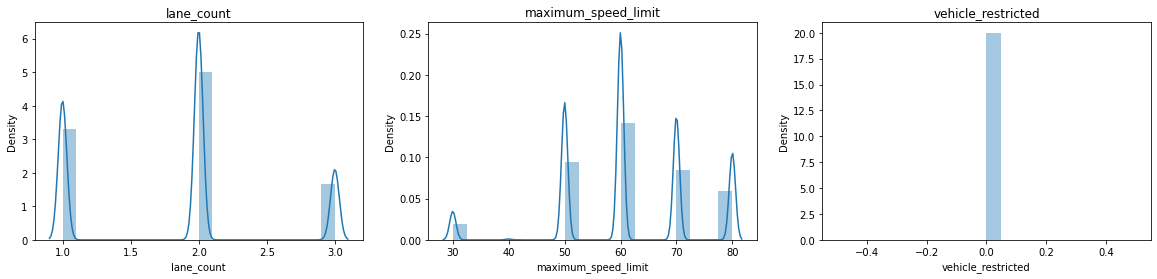

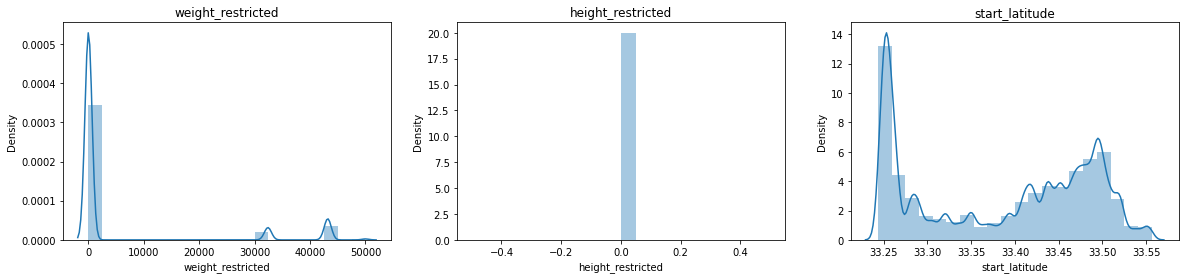

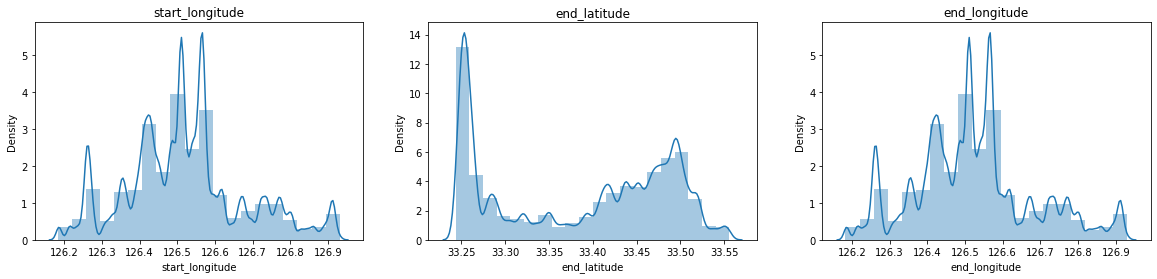

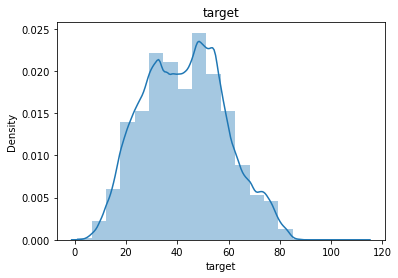

In [51]:
for i in range(0, 7, 3):
    vis(train_df, numerical[i], numerical[i+1], numerical[i+2])

plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.title('target')
sns.distplot(train_df['target'], hist = True, bins=20)
plt.show()

# 이변량 분석

<AxesSubplot:>

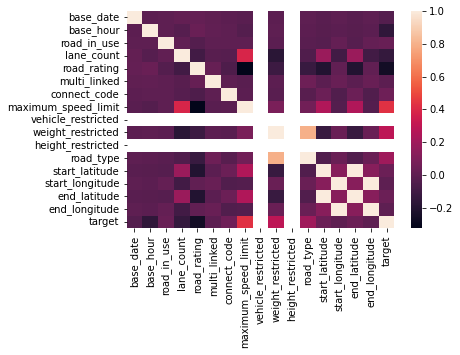

In [18]:
sns.heatmap(train_df.corr())

# 위경도 분석

In [52]:
!pip install folium

     -------------------------------------- 95.0/95.0 kB 901.9 kB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB ? eta 0:00:00
     ---------------------------------------- 161.1/161.1 kB ? eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 8.7 MB/s eta 0:00:00


In [75]:
start = train_df.loc[0, ['start_latitude', 'start_longitude']].tolist()
end = train_df.loc[0, ['start_latitude', 'start_longitude']].tolist()

lines = [start, end]
lines

[[33.427747274683, 126.662612038652], [33.427747274683, 126.662612038652]]

In [76]:
import folium

center = [33.379176, 126.564955]
m = folium.Map(location=center, zoom_start=11)
folium.PolyLine(locations = lines).add_to(m)

m